In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./Yerevan-Hotels.csv')

In [3]:
df.head()

,Hotel Names,Star Rating,Rating,Free Parking,Fitness Centre,Spa and Wellness Centre,Airport Shuttle,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day ($)
0,Hayasa Hotel Yerevan,4,9.0,No,Yes,No,Yes,9.2,9.0,9.1,9.5,9.4,88
1,Latar Hotel Yerevan,5,8.1,No,Yes,Yes,Yes,8.4,8.3,7.4,8.7,8.5,87
2,Alex Hotel,4,8.5,Yes,No,No,Yes,8.9,8.4,8.1,8.7,8.8,56
3,ENIGMA HOSTEL,None,8.8,No,No,No,Yes,9.6,8.7,9.7,8.7,9.1,20
4,Ani Grand Hotel Yerevan,4,8.8,No,Yes,No,No,8.9,8.7,9.4,9.1,9.0,130


In [4]:
df.describe()

,Price Per Day ($)
count,45.000000
mean,76.488889
std,31.978418
min,20.000000
25%,52.000000
50%,75.000000
75%,100.000000
max,150.000000


In [5]:
df.shape

(45, 13)

In [6]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

columns_to_encode = ['Free Parking', 'Fitness Centre', 'Spa and Wellness Centre', 'Airport Shuttle']
for column in columns_to_encode:
    df[column] = labelencoder.fit_transform(df[column])
    
df.replace('None',np.nan,inplace=True)
df.dropna(inplace=True)
df.shape

(36, 13)

In [7]:
df.head()

,Hotel Names,Star Rating,Rating,Free Parking,Fitness Centre,Spa and Wellness Centre,Airport Shuttle,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day ($)
0,Hayasa Hotel Yerevan,4,9.0,0,1,0,1,9.2,9.0,9.1,9.5,9.4,88
1,Latar Hotel Yerevan,5,8.1,0,1,1,1,8.4,8.3,7.4,8.7,8.5,87
2,Alex Hotel,4,8.5,1,0,0,1,8.9,8.4,8.1,8.7,8.8,56
4,Ani Grand Hotel Yerevan,4,8.8,0,1,0,0,8.9,8.7,9.4,9.1,9.0,130
5,SpaHotel,3,8.3,1,0,1,1,9.1,8.4,7.2,8.5,8.8,32


In [8]:
X=df.drop(['Hotel Names','Price Per Day ($)'],axis=1)
Y=df['Price Per Day ($)']
X.head()

,Star Rating,Rating,Free Parking,Fitness Centre,Spa and Wellness Centre,Airport Shuttle,Staff,Facilities,Location,Comfort,Cleanliness
0,4,9.0,0,1,0,1,9.2,9.0,9.1,9.5,9.4
1,5,8.1,0,1,1,1,8.4,8.3,7.4,8.7,8.5
2,4,8.5,1,0,0,1,8.9,8.4,8.1,8.7,8.8
4,4,8.8,0,1,0,0,8.9,8.7,9.4,9.1,9.0
5,3,8.3,1,0,1,1,9.1,8.4,7.2,8.5,8.8


In [9]:
from sklearn.preprocessing import StandardScaler

X = np.array(X, dtype=object)
Y = np.array(Y, dtype=object)

scaler=StandardScaler()
X=scaler.fit_transform(X)

In [10]:
X_train=X[:30,:]
Y_train=Y[:30]
X_test=X[30:,:]
Y_test=Y[30:]

# Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [12]:
y_pred=model.predict(X_test)
y_pred

array([ 79.03599855, 103.7204544 , 116.62107954,  92.06073697,
        67.67540076,  99.7909741 ])

In [13]:
Y_test

array([97, 140, 100, 118, 102, 118], dtype=object)

In [14]:
model.score(X_train,Y_train)

0.6145680733883863

# Decision Tree

In [15]:
from sklearn import tree

In [16]:
model=tree.DecisionTreeRegressor(max_depth=50)

In [17]:
model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=50)

In [18]:
Y_test

array([97, 140, 100, 118, 102, 118], dtype=object)

In [19]:
y_pred=model.predict(X_test)
y_pred

array([ 55., 102., 116.,  65.,  55., 130.])

In [20]:
model.score(X_train,Y_train)

1.0

# Support Vector Machines

In [21]:
from sklearn.svm import SVR

### Linear SVR

In [22]:
model=SVR(kernel='linear')
model.fit(X_train,Y_train)

SVR(kernel='linear')

In [23]:
model.score(X_train,Y_train)

0.5113127964658954

In [24]:
y_pred=model.predict(X_test)
y_pred

array([ 77.52853805, 106.8439025 ,  95.4112615 ,  95.30197687,
        71.88170379,  97.08409202])

### Polynomial SVR 

In [25]:
model=SVR(kernel='poly',degree=3)
model.fit(X_train,Y_train)

SVR(kernel='poly')

In [26]:
model.score(X_train,Y_train)

0.13563898682890285

In [27]:
y_pred=model.predict(X_test)
y_pred

array([75.28278658, 76.19246299, 75.44933428, 75.53501342, 75.31373111,
       75.70060732])

### Radial Basis SVR

In [28]:
model=SVR(kernel='rbf')
model.fit(X_train,Y_train)

SVR()

In [29]:
model.score(X_train,Y_train)

0.054523938404276384

In [30]:
y_pred=model.predict(X_test)
y_pred

array([75.21379014, 76.99915319, 75.89798309, 75.77095152, 75.00108032,
       76.38227398])

### Sigmoid SVR

In [31]:
model=SVR(kernel='sigmoid')
model.fit(X_train,Y_train)

SVR(kernel='sigmoid')

In [32]:
model.score(X_train,Y_train)

0.11024751726794546

In [33]:
y_pred=model.predict(X_test)
y_pred

array([75.66142522, 79.60964596, 77.26506926, 76.50962304, 75.39459872,
       77.82684003])

### Grid Search SVR

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.01,0.1,0.5,1,10,100],
            'gamma':[1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
            'kernel':['linear','poly','rbf','sigmoid']
           }

grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=1)
grid.fit(X_train, Y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

Fitting 5 folds for each of 168 candidates, totalling 840 fits
Best params: {'C': 1, 'gamma': 0.25, 'kernel': 'poly'}


In [35]:
y_pred=grid.predict(X_test)
y_pred

array([82.12461341, 96.15170118, 84.44714297, 90.39906841, 79.31296349,
       88.64928446])

# Principal Component Analysis

### Manually Fitting the number of components

In [36]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
X=pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.48323449, 0.20380608, 0.09850184])

Text(0, 0.5, 'Second Principal Component')

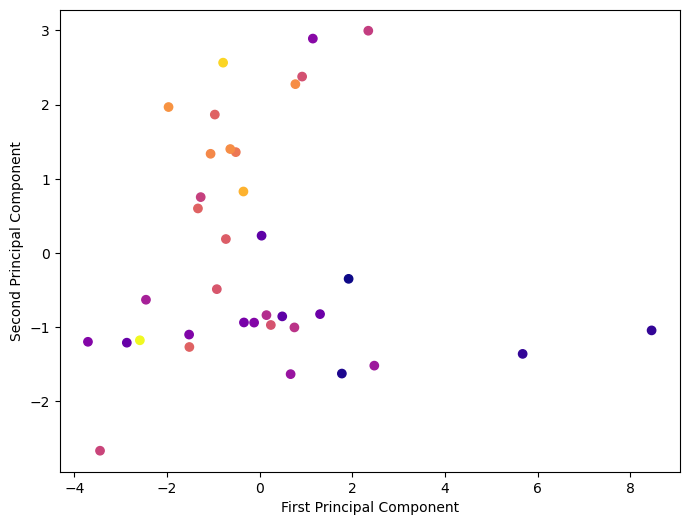

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=Y,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

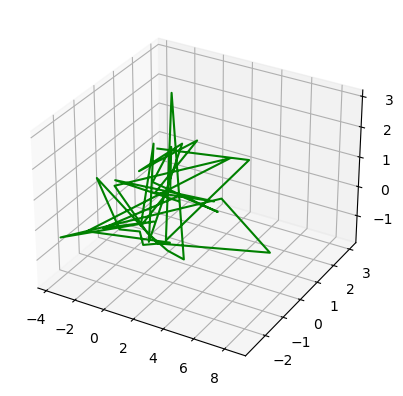

In [38]:
# Creating an empty figure for 
# 3D plotting
fig = plt.figure()
 
# using fig.gca, we are creating a 3D 
# projection plot in the empty figure
ax = plt.axes(projection="3d")
 
# Creating a wireframe plot with the x,y and
# z-coordinates respectively along with the 
# color as red
ax.plot3D(X[:,0],X[:,1],X[:,2], color="green")
 
# Creating a wireframe plot with the points 
# x1,y1,z1 along with the plot line as green
 
#showing the above plot
plt.show()

In [39]:
model=SVR(kernel='poly',degree=3)
model.fit(X,Y)

SVR(kernel='poly')

In [40]:
model.score(X,Y)

0.17781075667952628

### Choosing Right number of dimensions

In [41]:
pca=PCA()
pca.fit(X)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

In [42]:
pca=PCA(n_components=d)
X=pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.61516028, 0.25944631, 0.12539341])

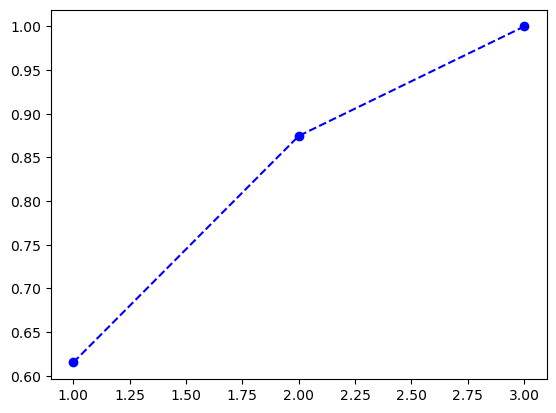

In [43]:
plt.plot(range(1, len(cumsum) + 1),cumsum,linestyle='--',color='b',marker='o')

In [44]:
pca.score(X,Y)

-5.53648832948257